In [1]:
import sys
sys.path.append("../core-scripts")
from zeroShearSpectrum3D import spectrum
import numpy as np
import matplotlib.pyplot as plt
from cheb import cheb
from scipy.linalg import eig
chebfit = np.polynomial.chebyshev.Chebyshev.fit

In [ ]:
k,a = 1.25, 1.09
evals_low, evecs_low = spectrum(k,a,M=50)
evals_high, evecs_high = spectrum(k,a,M=100)
re_evals_low = np.real(evals_low)
re_evals_high = np.real(evals_high)
sort_idx_low = np.argsort(-re_evals_low)
re_evals_low = re_evals_low[sort_idx_low]
sort_idx_high = np.argsort(-re_evals_high)
re_evals_high = re_evals_high[sort_idx_high];

In [ ]:
n = min(len(re_evals_low), len(re_evals_high))
diffs = np.abs(re_evals_low[0:n] - re_evals_high[0:n])
# plt.plot(np.arange(n), diffs)
plt.figure()
plt.plot(np.arange(n), diffs, marker='x')
plt.figure()
plt.scatter(np.arange(n), np.log(1/diffs), marker='x');

In [ ]:
def plot_modes(idx, ygl, evecs, M=100):
    yy = np.linspace(-1,1,500)
    plt.figure()
    fig, axs = plt.subplots(3, 3)
    Vx = np.reshape(evecs[idx,0:M], -1)
#     Re_Vx = chebfit(ygl,np.real(Vx),M)(yy)
    axs[0,0].plot(ygl, np.real(Vx))
    axs[0,0].plot(ygl, np.imag(Vx))
    axs[0,0].title.set_text('$V_x$')

    Vy = np.reshape(evecs[idx,M:2*M], -1)
    axs[0,1].plot(ygl, np.real(Vy))
    axs[0,1].plot(ygl, np.imag(Vy))
    axs[0,1].title.set_text('$V_y$')

    Vz = np.reshape(evecs[idx,2*M:3*M], -1)
    axs[0,2].plot(ygl, np.real(Vz))
    axs[0,2].plot(ygl, np.imag(Vz))
    axs[0,2].title.set_text('$V_z$')

    Qxx = np.reshape(evecs[idx,3*M:4*M], -1)
    axs[1,0].plot(ygl, np.real(Qxx))
    axs[1,0].plot(ygl, np.imag(Qxx))
    axs[1,0].title.set_text('$Q_{xx}$')

    Qxy = np.reshape(evecs[idx,4*M:5*M], -1)
    axs[1,1].plot(ygl, np.real(Qxy))
    axs[1,1].plot(ygl, np.imag(Qxy))
    axs[1,1].title.set_text('$Q_{xy}$')

    Qxz = np.reshape(evecs[idx,5*M:6*M], -1)
    axs[1,2].plot(ygl, np.real(Qxz))
    axs[1,2].plot(ygl, np.imag(Qxz))
    axs[1,2].title.set_text('$Q_{xz}$')

    Qyz = np.reshape(evecs[idx,6*M:7*M], -1)
    axs[2,0].plot(ygl, np.real(Qyz))
    axs[2,0].plot(ygl, np.imag(Qyz))
    axs[2,0].title.set_text('$Q_{yz}$')

    Qzz = np.reshape(evecs[idx,7*M:8*M], -1)
    Re_Qzz = chebfit(ygl, np.real(Qzz), M)(yy)
    Im_Qzz = chebfit(ygl, np.imag(Qzz), M)(yy)
    axs[2,1].plot(yy, Re_Qzz)
    axs[2,1].plot(yy, Im_Qzz)
    axs[2,1].title.set_text('$Q_{zz}$')
    
    for ax in axs.flat:
        ax.set(xlabel='$y$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

In [ ]:
idx = sort_idx_low[10]
print(evals_low[idx])
_, ygl = cheb(50)
plot_modes(idx, ygl, evecs_low, M=50)

In [ ]:
# Analytical solution to the Qzz equation
n = np.array(range(50),dtype='d')
sigmas = -0.01*(np.pi**2)*n*n/4 - 1 - 0.01*(k**2)

In [ ]:
np.round(sigmas,5)

In [ ]:
idx=sort_idx_low[6]
plot_modes(idx,ygl,evecs_low,M=50)

In [ ]:
M=50
_, ygl = cheb(M)
Qzz = np.reshape(evecs_low[7*M:8*M,idx], -1)
Re_Qzz = chebfit(ygl, np.real(Qzz), M)(yy)
Im_Qzz = chebfit(ygl, np.imag(Qzz), M)(yy)
plt.plot(yy, Re_Qzz)
plt.plot(yy, Im_Qzz)
plt.title('$Q_{zz}$')

In [ ]:
evecs_low.shape

In [ ]:
len(evals_low)

In [2]:
k,a = 1.25, 1.09
evals, evecs = spectrum(k,a,M=50)

There are 99 finite eigenvalues
The shape of the eigenmodes is (400, 400)
The shape of the cleaned eigenmodes is (400, 99)


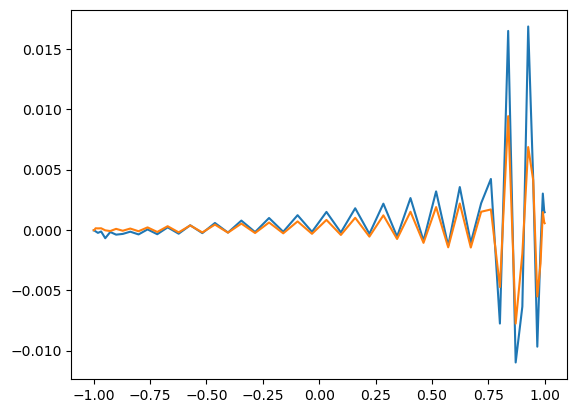

In [20]:
M=50
_,ygl=cheb(M)
Qzz = np.reshape(evecs[4*M:5*M,78], -1)
yy = np.linspace(-1,1,500)
plt.plot(ygl, np.real(Qzz))
plt.plot(ygl, np.imag(Qzz))